과제 1: Penguins 데이터 탐색
sns.load_dataset('penguins')로 데이터 불러와서

→ 시각화, Train/Test 분할해보기

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
# ① 폰트 설정 (Windows 기본 폰트: 맑은 고딕)
plt.rcParams.update({
    "font.family": "Malgun Gothic",  # 윈도우 기본 한글 폰트
    "font.size": 10,
    "axes.unicode_minus": False,     # 마이너스 깨짐 방지
})

In [ ]:
penguins  = sns.load_dataset('penguins')

penguins  # 종류, 서식지, 부리 길이,깊이, 날개길이, 몸무게, 성별, 서식지

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [28]:
# 2. 데이터 확인
#print(penguins.head())
#print(penguins.info())
print(penguins.describe())

       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000      15.600000         190.000000  3550.000000
50%         44.450000      17.300000         197.000000  4050.000000
75%         48.500000      18.700000         213.000000  4750.000000
max         59.600000      21.500000         231.000000  6300.000000


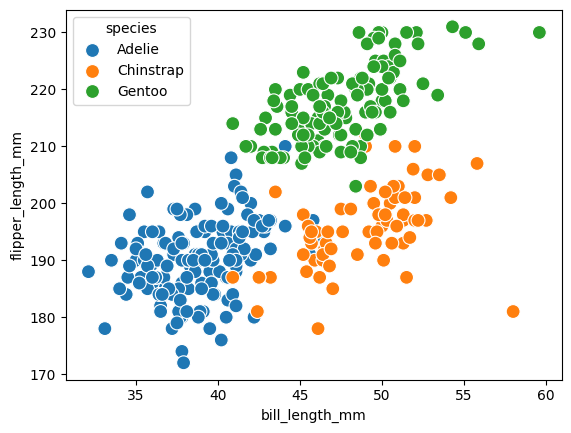

In [39]:
sns.scatterplot(data=penguins, x='bill_length_mm', 
                y='flipper_length_mm', hue='species', s=100)
plt.show()


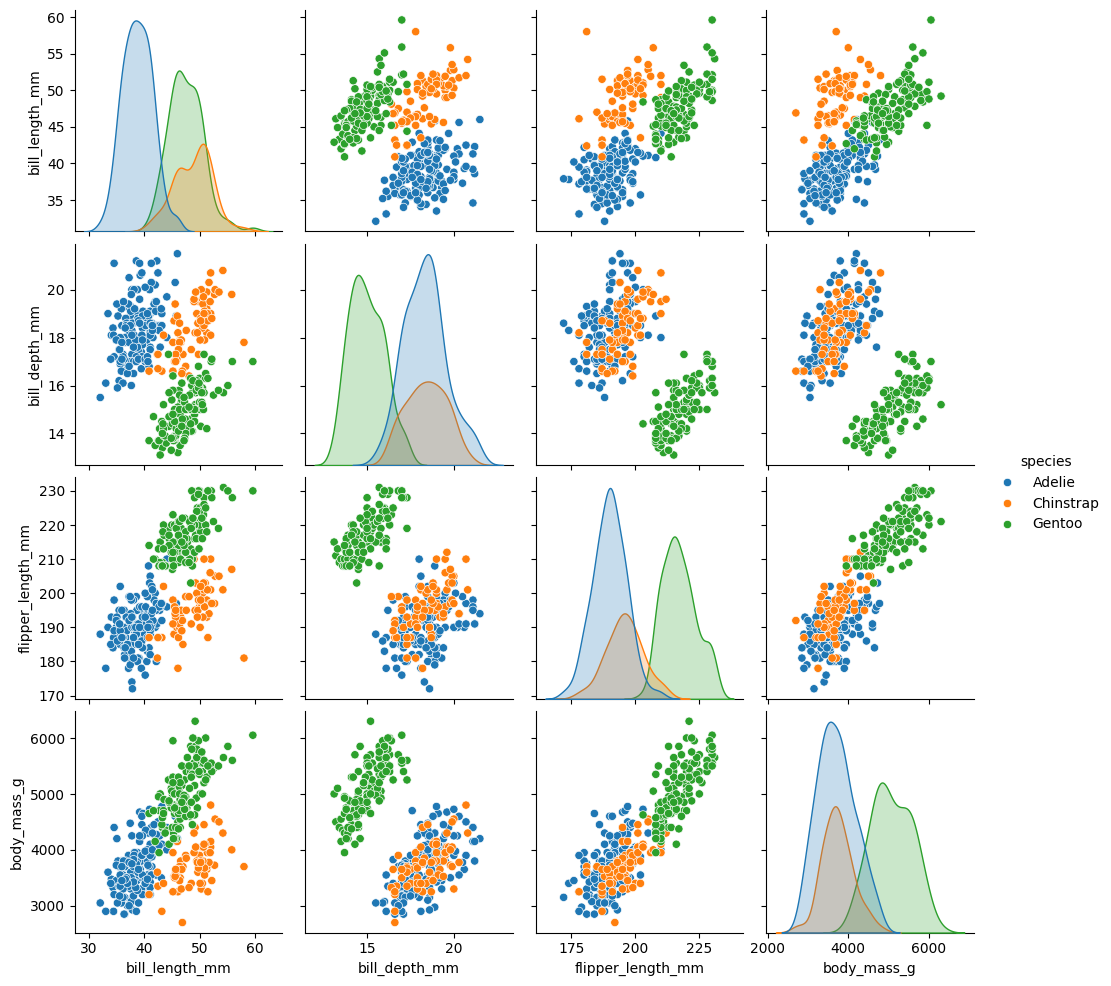

In [ ]:
# 모든 숫자형 변수끼리 짝지어서 그래프 만들기
sns.pairplot(penguins, hue="species") 

In [30]:
penguins = penguins.dropna()

In [42]:
from sklearn.model_selection import train_test_split

# X는 입력값, y는 정답(타깃)이 됨
X = penguins.drop("species", axis=1) # species 제외시키기
y = penguins["species"]



# 훈련용:검증용 = 8:2로 나누기
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [43]:
print("X_train:", X_train.shape) # 학습용 입력 데이터
print("y_train:", y_train.shape) # 학습용 정답
print("X_test:", X_test.shape) # 시험용 입력 데이터
print("y_test:", y_test.shape) # 시험용 정답


X_train: (275, 6)
y_train: (275,)
X_test: (69, 6)
y_test: (69,)


In [44]:
print(X.columns)


Index(['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')


c:\Users\USER\anaconda3\envs\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128039 (\N{PENGUIN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


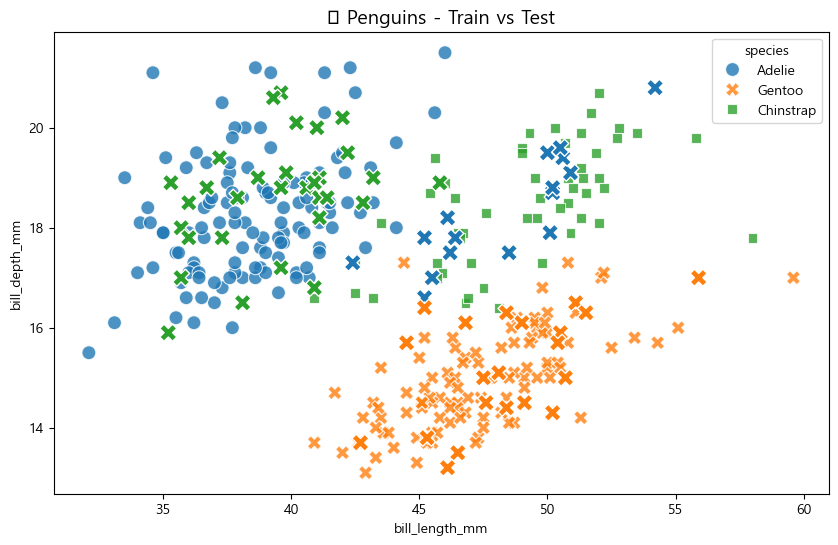

In [ ]:
# 데이터 나눠진 것 시각화 해서 보기
import matplotlib.pyplot as plt
import seaborn as sns

# 훈련용 데이터프레임
train_df = X_train.copy()
train_df["species"] = y_train

# 시험용 데이터프레임
test_df = X_test.copy()
test_df["species"] = y_test

# 그림 크기 지정
plt.figure(figsize=(10, 6))

# 훈련 데이터 (● 원형)
sns.scatterplot(
    data=train_df,
    x="bill_length_mm", # 부리 길이
    y="bill_depth_mm",  # 부리 두께
    hue="species",      # 펭귄 종으로 색 구분
    s=100,
    style="species",
    alpha=0.8
)

# 시험 데이터 (X자 표시)
sns.scatterplot(
    data=test_df,
    x="bill_length_mm", # 부리 길이
    y="bill_depth_mm",  # 부리 두께
    hue="species",      # 펭귄 종으로 색 구분
    s=150,
    marker="X",
    legend=False
)

plt.title("Penguins - Train vs Test", fontsize=14)
plt.show()


과제 2: Tips 데이터 탐색
sns.load_dataset('tips')로 팁 금액 분석

→ train/test 셋 분류, 분류 시각화

In [45]:
tips = sns.load_dataset("tips")

print(tips.head())
print(tips.info())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None


<Axes: xlabel='day', ylabel='tip'>

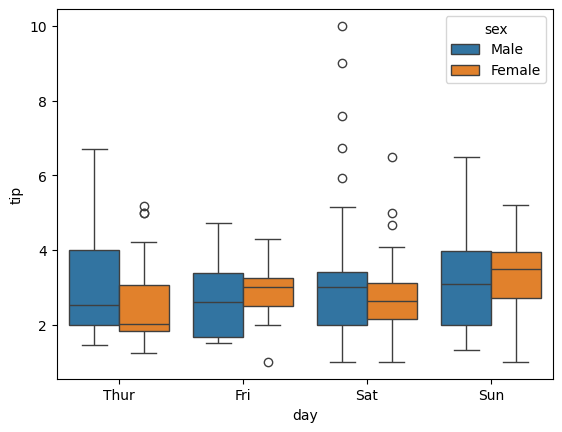

In [ ]:
# 범주,숫자 비교는 boxplot, barplot이 좋다. 아까 펭귄은 수치들이라 scatterplot, pairplot
sns.boxplot(x="day", y="tip", hue="sex", data=tips)

In [46]:
X_tips = tips[["total_bill", "size"]]
y_tips = tips["tip"]

X_train_tips, X_test_tips, y_train_tips, y_test_tips = train_test_split(
    X_tips, y_tips, test_size=0.2, random_state=42
)

In [47]:
print("X_train_tips:", X_train_tips.shape) # 학습용 입력 데이터
print("y_train_tips:", y_train_tips.shape) # 학습용 정답
print("X_test_tips:", X_test_tips.shape) # 시험용 입력 데이터
print("y_test_tips:", y_test_tips.shape) # 시험용 정답

X_train_tips: (195, 2)
y_train_tips: (195,)
X_test_tips: (49, 2)
y_test_tips: (49,)


c:\Users\USER\anaconda3\envs\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127869 (\N{FORK AND KNIFE WITH PLATE}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


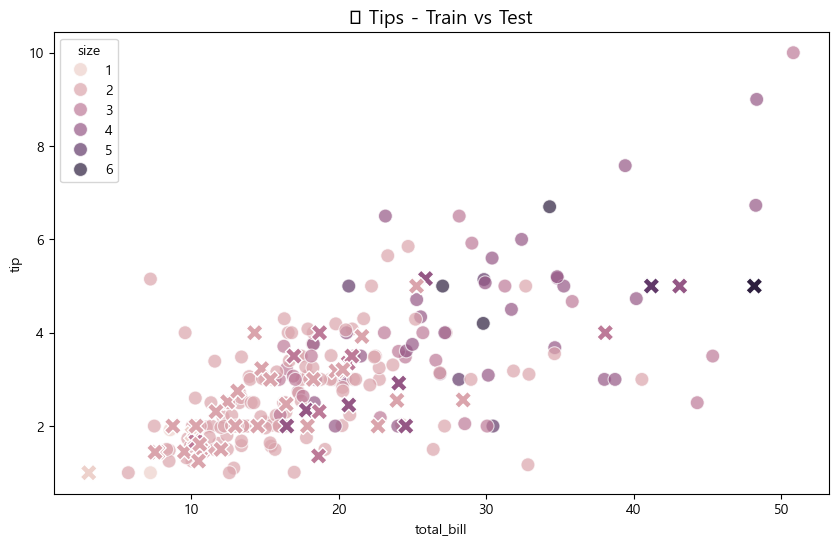

In [ ]:
# 데이터 나눠진 것 시각화 해서 보기
# 훈련용 데이터프레임
train_df_tips = X_train_tips.copy()
train_df_tips["tip"] = y_train_tips

# 시험용 데이터프레임
test_df_tips = X_test_tips.copy()
test_df_tips["tip"] = y_test_tips

plt.figure(figsize=(10, 6))

# 훈련 데이터 (● 원형)
sns.scatterplot(
    data=train_df_tips,
    x="total_bill", # 총 금액
    y="tip",        # 팁 금액
    hue="size",     # 인원 수별 색상
    s=100,
    alpha=0.7
)

# 시험 데이터 (X자 표시)
sns.scatterplot(
    data=test_df_tips,
    x="total_bill", # 총 금액
    y="tip",        # 팁 금액
    hue="size",     # 인원 수별 색상
    s=150,
    marker="X",
    legend=False
)

plt.title("Tips - Train vs Test", fontsize=14)
plt.show()
